# Benchmarks for Circuit Unoptimization in ZNE

In [1]:
from unopt.benchmark import bench
from unopt.circuit import generate_random_two_qubit_gate_circuit
from unopt.plots import plot_avg_circuit_depths

from mitiq import zne

Trial 1/10
Trial 2/10
Trial 3/10
Trial 4/10
Trial 5/10
Trial 6/10
Trial 7/10
Trial 8/10
Trial 9/10
Trial 10/10
Average ideal value: 1.0
Average unmitigated expectation value: 0.37132
Average ZNE + fold value: 0.4233349999999999
Average ZNE + unopt value: 0.4427471843245686
ZNE/unopt improvement over unmitigated: 12.82%
ZNE/unopt improvement over ZNE/fold: 3.48%


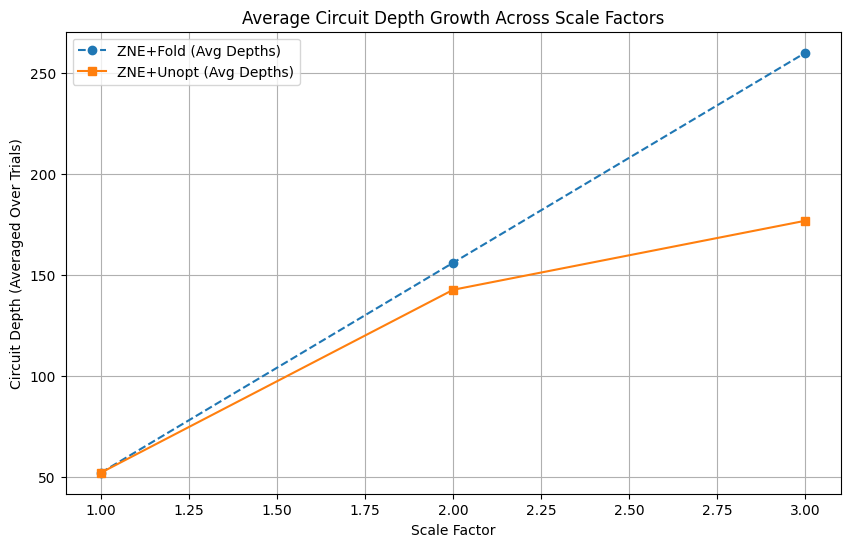

In [7]:
results = bench(
    qc=generate_random_two_qubit_gate_circuit(num_qubits=5, depth=35),
    scale_factors_zne=[1, 3, 5],
    iterations_unopt=[0, 1, 2],
    extrapolation_method=zne.LinearFactory,
    trials=10,
    verbose=True,
)

plot_avg_circuit_depths(results)